In [1]:
""" Functions for generating 2D grid maps, for AI Lab 2 - path planning.
"""

import random
import numpy as np
import matplotlib.pyplot as plt

percentOfObstacle = 0.9  # 30% - 60%, random

def generateMap2d(size_):

    '''Generates a random 2d map with obstacles (small blocks) randomly distributed. 
       You can specify any size of this map but your solution has to be independent of map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid map, e.g. [60, 60]. The height and width of the map shall be greater than 20.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid map, cells with a value of 0: Free cell; 
                                                -1: Obstacle;
                                                -2: Start point;
                                                -3: Goal point;
    '''
    
    size_x, size_y = size_[0], size_[1]

    map2d = np.random.rand(size_y, size_x)
    perObstacles_ = percentOfObstacle
    map2d[map2d <= perObstacles_] = 0
    map2d[map2d > perObstacles_] = -1

    yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
    while (yloc[0] == yloc[1]) and (xloc[0] == xloc[1]):
        yloc, xloc = [np.random.random_integers(0, size_x-1,2), np.random.random_integers(0, size_y-1, 2)]

    map2d[xloc[0]][yloc[0]] = -2
    map2d[xloc[1]][yloc[1]] = -3
    
    print('start',map2d[xloc[0]][yloc[0]], 'Goal', map2d[xloc[1]][yloc[1]]  )
    print('start',xloc[0], yloc[0], 'Goal', xloc[1], yloc[1])
    

    return map2d

In [2]:
# Generate 2d grid map with rotated-H-shape object
def generateMap2d_obstacle(size_):
    '''Generates a random 2d map with a rotated-H-shape object in the middle and obstacles (small blocks) randomly distributed. 
       You can specify any size of this map but your solution has to be independent of map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid map, e.g. [60, 60]. The height and width of the map shall be greater than 40.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid map, cells with a value of 0: Free cell; 
                                               -1: Obstacle;
                                               -2: Start point;
                                               -3: Goal point;
                                            
       [ytop, ybot, minx] : list
           information of the rotated-H-shape object
           ytop - y coordinate of the top horizontal wall/part
           ybot - y coordinate of the bottom horizontal wall/part
           minx - X coordinate of the vertical wall 
    '''
    
    size_x, size_y = size_[0], size_[1]
    map2d = generateMap2d(size_)

    map2d[map2d==-2] = 0
    map2d[map2d==-3] = 0

    # add special obstacle
    xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
    ytop = np.random.random_integers(7*size_y//10 + 3, size_y - 5)
    xbot = np.random.random_integers(3, 3*size_x//10-5), np.random.random_integers(7*size_x//10+3, size_x-5)
    ybot = np.random.random_integers(5, size_y//5 - 3)


    map2d[ybot, xbot[0]:xbot[1]+1] = -1
    map2d[ytop, xtop[0]:xtop[1]+1] = -1
    minx = (xbot[0]+xbot[1])//2
    maxx = (xtop[0]+xtop[1])//2
    if minx > maxx:
        tempx = minx
        minx = maxx
        maxx = tempx
    if maxx == minx:
        maxx = maxx+1

    map2d[ybot:ytop, minx:maxx] = -1
    startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]

    map2d[startp[1], startp[0]] = -2
    goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]

    map2d[goalp[1],goalp[0]] = -3
    #return map2d, [startp[1], startp[0]], [goalp[1], goalp[0]], [ytop, ybot]
    return map2d, [ytop, ybot, minx]

In [3]:
# helper function for plotting the result
def plotMap(map2d_, path_=None, title_ =''):
    
    '''Plots a map (image) of a 2d matrix with a path from start point to the goal point. 
        cells with a value of 0: Free cell; 
                             -1: Obstacle;
                             -2: Start point;
                             -3: Goal point;
    Parameters:
    -----------
    map2d_ : array-like
        an array with Real Numbers
        
    path_ : array-like
        an array of 2d corrdinates (of the path) in the format of [[x0, y0], [x1, y1], [x2, y2], ..., [x_end, y_end]]
        
    title_ : string
        information/description of the plot

    Returns:
    --------

    '''
    
    import matplotlib.cm as cm
    plt.interactive(False)
    
    colors_nn = int(map2d_.max())
    colors = cm.winter(np.linspace(0, 1, colors_nn))

    colorsMap2d = [[[] for x in range(map2d_.shape[1])] for y in range(map2d_.shape[0])]
    # Assign RGB Val for starting point and ending point
    locStart, locEnd = np.where(map2d_ == -2), np.where(map2d_ == -3)
    
    
    colorsMap2d[locStart[0][0]][locStart[1][0]] = [.0, .0, .0, 1.0]  # black
    colorsMap2d[locEnd[0][0]][locEnd[1][0]] = [0.8, 0.4, 0.1, 0.5]  # white

    # Assign RGB Val for obstacle
    locObstacle = np.where(map2d_ == -1)
    for iposObstacle in range(len(locObstacle[0])):
        colorsMap2d[locObstacle[0][iposObstacle]][locObstacle[1][iposObstacle]] = [1.0, .0, .0, 1.0]
    # Assign 0
    locZero = np.where(map2d_ == 0)

    for iposZero in range(len(locZero[0])):
        colorsMap2d[locZero[0][iposZero]][locZero[1][iposZero]] = [1.0, 1.0, 1.0, 1.0]

    # Assign Expanded nodes
    locExpand = np.where(map2d_>0)

    for iposExpand in range(len(locExpand[0])):
        _idx_ = int(map2d_[locExpand[0][iposExpand]][locExpand[1][iposExpand]]-1)
        colorsMap2d[locExpand[0][iposExpand]][locExpand[1][iposExpand]] = colors[_idx_]

    for irow in range(len(colorsMap2d)):
        for icol in range(len(colorsMap2d[irow])):
            if colorsMap2d[irow][icol] == []:
                colorsMap2d[irow][icol] = [1.0, 0.0, 0.0, 1.0]
                
    if  path_ is not None: path = path_.T.tolist()
    
    plt.figure()
    plt.title(title_)
    plt.imshow(colorsMap2d, interpolation='nearest')
    plt.colorbar()
    if  path_ is not None:plt.plot(path[:][0],path[:][1], color='magenta',linewidth=2.5)
    plt.show()



In [4]:
x = np.random.randint(5, size=2)
x1, y1 = x
y = [x1, y1]
y

[4, 0]

In [11]:
import warnings
warnings.filterwarnings('ignore')

def randomSearch(mapToSearch):
    searchMap = np.copy(mapToSearch)

    for mapRow in range(len(mapToSearch)):
        for mapColumn in range(len(mapToSearch)):
            # print the map's rows and columns 
            print(mapToSearch[mapRow][mapColumn], end='\t')
            if mapToSearch[mapRow][mapColumn]==-2:
                xStart, yStart = mapRow, mapColumn
                
            if mapToSearch[mapRow][mapColumn]==-3:
                xGoal, yGoal = mapRow, mapColumn

    startPos=[xStart, yStart]
    goalPos=[xGoal, yGoal]

    # cost moving to another cell
    movingCost=0
    
    # set to store visited cells
    pathVisited=[]
    pathVisited.append([startPos])
    
    # To check if path found or not 
    pathFound=False

    # path taken
    fromPath=[]
    fromPath.append(startPos)

    while (not pathFound and len(pathVisited)!=len(mapToSearch)**2):
        row, column = np.random.randint(len(mapToSearch), size=2)
        current=[row, column]
        if current in pathVisited:
            continue
        pathVisited.append([row,column])
        if mapToSearch[row][column]==-1:
            continue
            
        fromPath.append(current)
        
        if current == goalPos:
            pathFound=True
            break
        
        # compute cost to reach next cell
        movingCost+=1
        if searchMap[row][column]!=-3 and mapToSearch[row][column]!=-1 and mapToSearch[row][column]!=-2:
            searchMap[row][column]=movingCost
        
        # add to path
        fromPath.append(current)

    if pathFound==False: 
        print(f"No path towards goal, total path visited: {pathVisited}, total Map Length: {len(mapToSearch)}")
        return -1
    else:
        fromPath2 = []
        for path in fromPath:
            row1, column1=path
            row1, column1=column1,row1
            fromPath2.append([row1,column1])
            
        fromPath=np.array(fromPath2)

        plotMap(mapToSearch)
        plotMap(searchMap, fromPath, 'path')
        return movingCost, len(fromPath)

start -2.0 Goal -3.0
start 50 4 Goal 55 59


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0

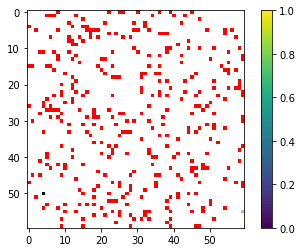

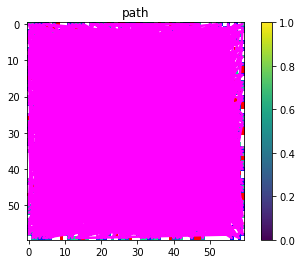

(2149, 4300)

In [12]:
mapToSearch = generateMap2d([60, 60])
randomSearch(mapToSearch)

start -2.0 Goal -3.0
start 7 39 Goal 9 21
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0

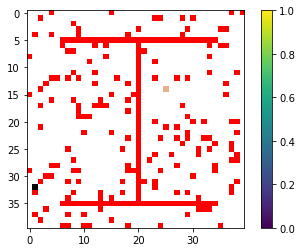

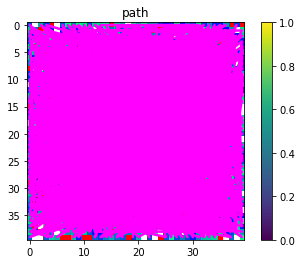

(1229, 2460)

In [7]:
mapToSearch2, info=generateMap2d_obstacle([40, 40])
randomSearch(mapToSearch2)

start -2.0 Goal -3.0
start 1 21 Goal 57 27


0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-2.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	

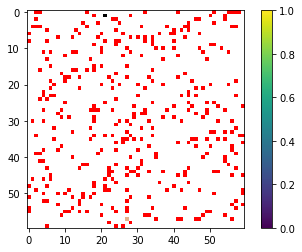

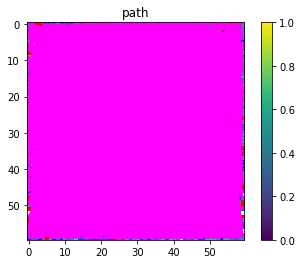

start -2.0 Goal -3.0
start 21 5 Goal 49 25


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0

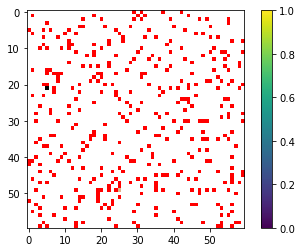

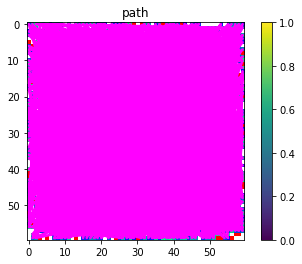

start -2.0 Goal -3.0
start 59 4 Goal 35 28


0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

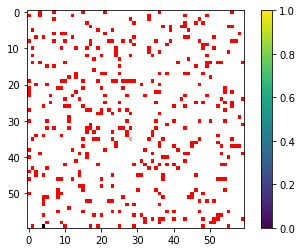

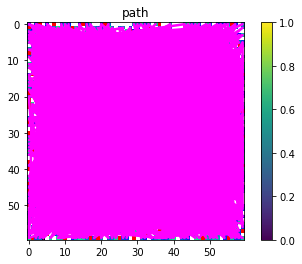

start -2.0 Goal -3.0
start 32 35 Goal 40 11


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0

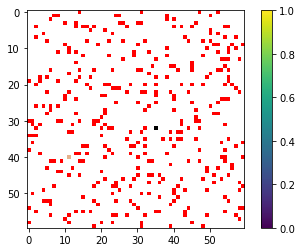

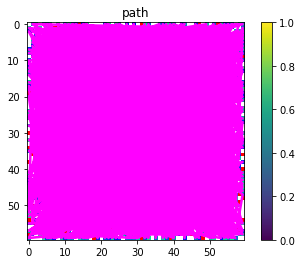

start -2.0 Goal -3.0
start 17 22 Goal 37 54


0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0

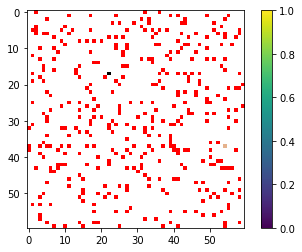

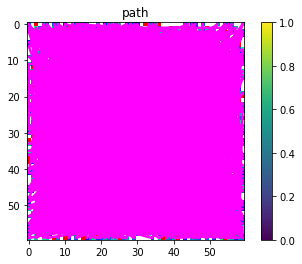

start -2.0 Goal -3.0
start 50 45 Goal 30 46


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.

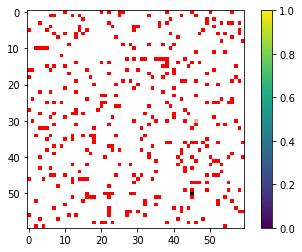

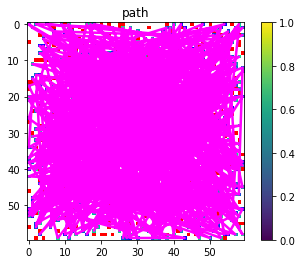

start -2.0 Goal -3.0
start 52 28 Goal 35 56


-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	

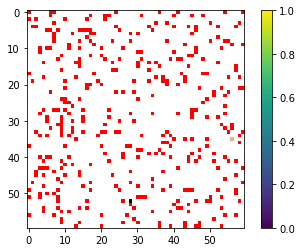

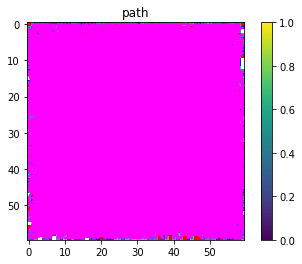

start -2.0 Goal -3.0
start 9 31 Goal 11 34


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0

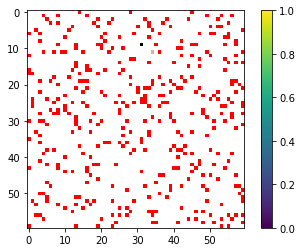

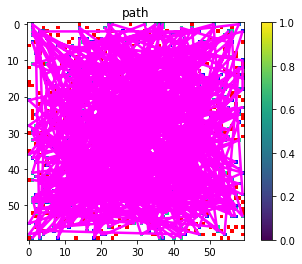

start -2.0 Goal -3.0
start 7 24 Goal 8 7


0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

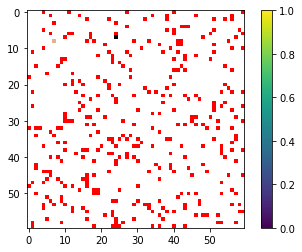

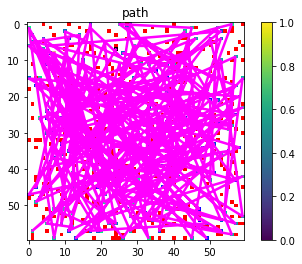

start -2.0 Goal -3.0
start 5 40 Goal 23 50


0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.

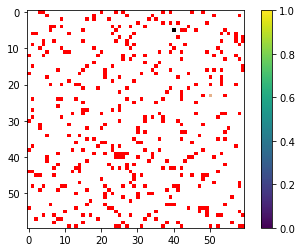

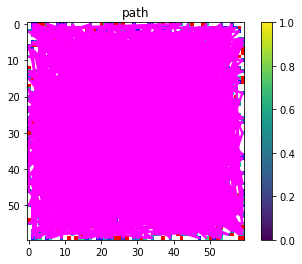

start -2.0 Goal -3.0
start 36 24 Goal 42 20


0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.

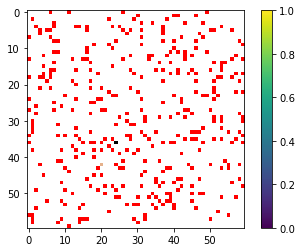

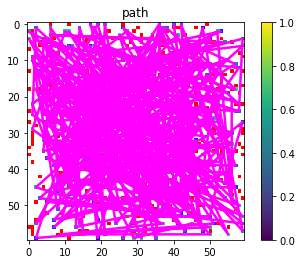

start -2.0 Goal -3.0
start 35 32 Goal 0 29


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-3.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	

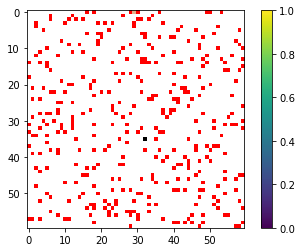

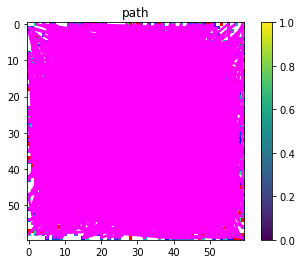

start -2.0 Goal -3.0
start 11 32 Goal 58 21


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

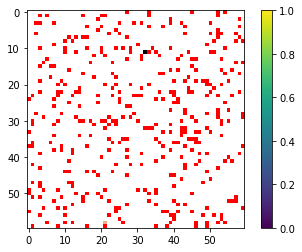

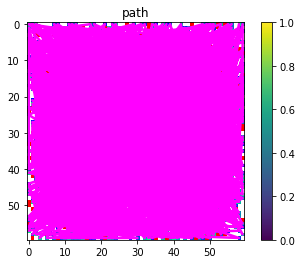

start -2.0 Goal -3.0
start 8 49 Goal 22 44


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

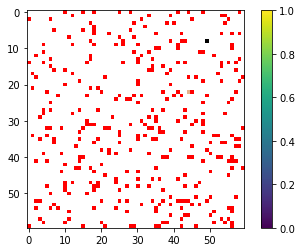

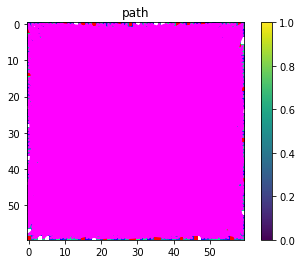

start -2.0 Goal -3.0
start 43 56 Goal 24 5


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.

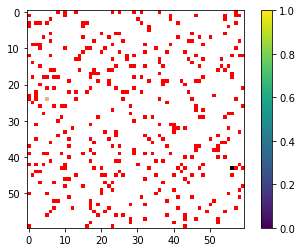

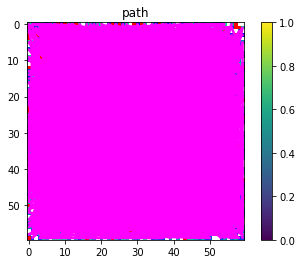

start -2.0 Goal -3.0
start 2 2 Goal 19 52


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-2.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	

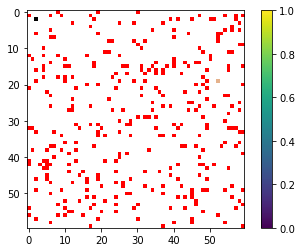

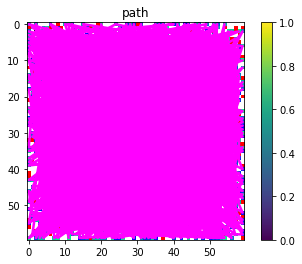

start -2.0 Goal -3.0
start 32 2 Goal 26 58


0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0

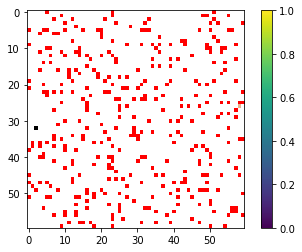

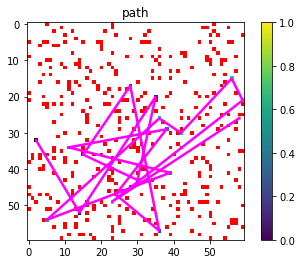

start -2.0 Goal -3.0
start 17 54 Goal 23 14


-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

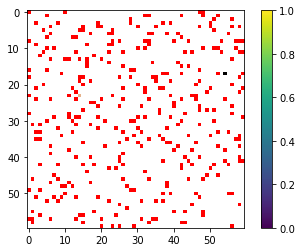

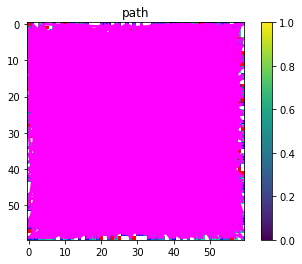

start -2.0 Goal -3.0
start 14 31 Goal 20 0


0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0

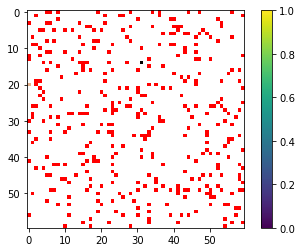

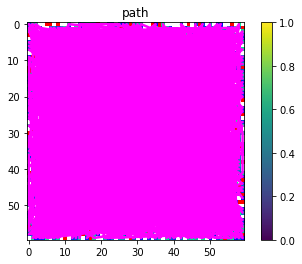

start -2.0 Goal -3.0
start 1 20 Goal 33 13


0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-2.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.

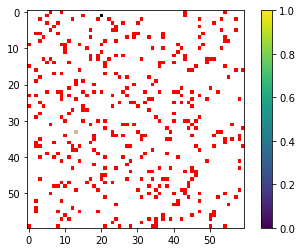

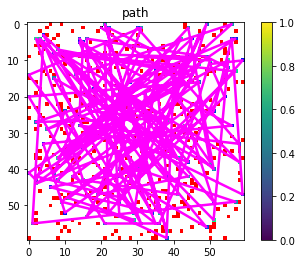

Total Nodes Expandes Per Iteration: [3161, 2419, 2333, 2130, 2128, 738, 3021, 539, 217, 1516, 365, 1610, 1889, 3036, 2712, 1840, 16, 2434, 2269, 134]
Total Path Taken Per Iteration: [6324, 4840, 4668, 4262, 4258, 1478, 6044, 1080, 436, 3034, 732, 3222, 3780, 6074, 5426, 3682, 34, 4870, 4540, 270]
Time Taken Per Iteration: [3.3420169353485107, 1.8101446628570557, 1.8288137912750244, 1.6417274475097656, 1.7508795261383057, 1.2280628681182861, 2.6646900177001953, 1.2813010215759277, 1.1930851936340332, 1.5606913566589355, 1.1584537029266357, 1.4625499248504639, 1.6048426628112793, 2.6090986728668213, 2.1500535011291504, 1.664825677871704, 1.279066562652588, 1.9700450897216797, 1.857546091079712, 1.2237718105316162]
Mean of Nodes: 1725.35
Mean of Path: 3452.7
Mean of Time Taken: 1.7640833258628845
Standard Deviation of Nodes: 1011.5425979660967
Standard Deviation of Nodes: 2023.0851959321933
Standard Deviation of Nodes: 0.5542790028682181


In [8]:
import time
import numpy

NodesExpanded = []
pathLength=[]
timeTakenPerIter = []

for i in range(20):
    map1 = generateMap2d([60, 60])
    start=time.time()
    expandCenter, randomPath=randomSearch(map1)
    stop=time.time()
    NodesExpanded.append(expandCenter)
    pathLength.append(randomPath)
    timed=stop-start
    timeTakenPerIter.append(timed)
    
    
print(f"Total Nodes Expandes Per Iteration: {NodesExpanded}") 
print(f"Total Path Taken Per Iteration: {pathLength}")
print(f"Time Taken Per Iteration: {timeTakenPerIter}")

print(f"Mean of Nodes: {numpy.mean(NodesExpanded)}")
print(f"Mean of Path: {numpy.mean(pathLength)}")
print(f"Mean of Time Taken: {numpy.mean(timeTakenPerIter)}")


print(f"Standard Deviation of Nodes: {numpy.std(NodesExpanded)}")
print(f"Standard Deviation of Path: {numpy.std(pathLength)}")
print(f"Standard Deviation of Time Taken: {numpy.std(timeTakenPerIter)}")

start -2.0 Goal -3.0
start 57 43 Goal 4 54


0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0

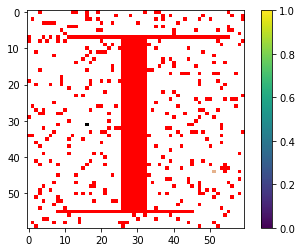

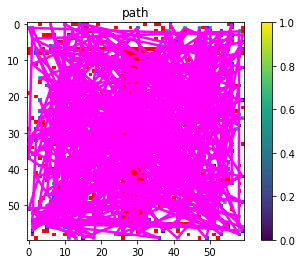

start -2.0 Goal -3.0
start 55 48 Goal 40 27


0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0

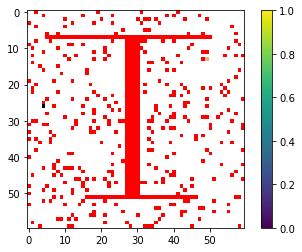

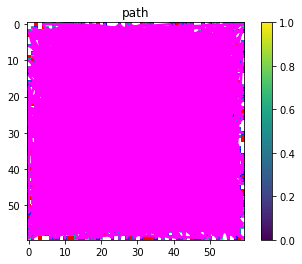

start -2.0 Goal -3.0
start 56 57 Goal 49 30


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0

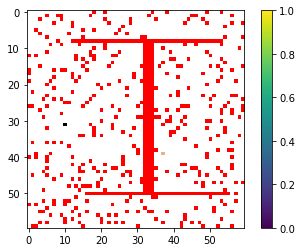

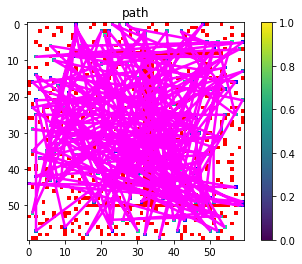

start -2.0 Goal -3.0
start 30 9 Goal 46 18


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1

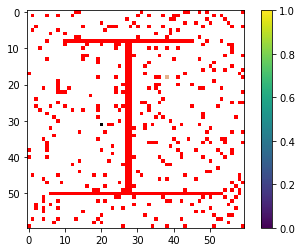

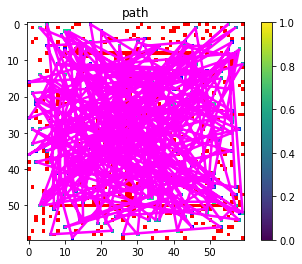

start -2.0 Goal -3.0
start 32 36 Goal 59 54


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

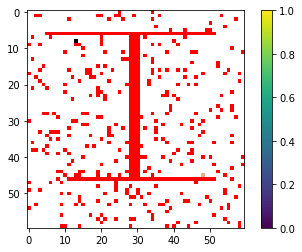

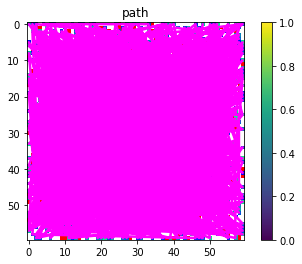

start -2.0 Goal -3.0
start 47 59 Goal 30 50


0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	

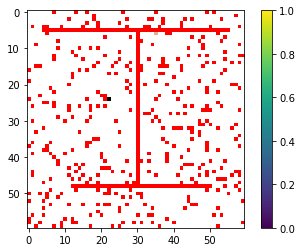

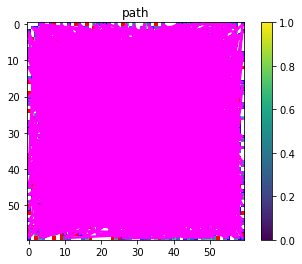

start -2.0 Goal -3.0
start 11 59 Goal 47 44


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0

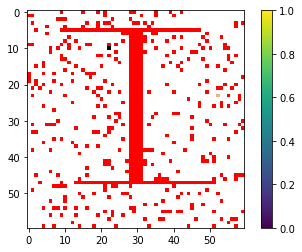

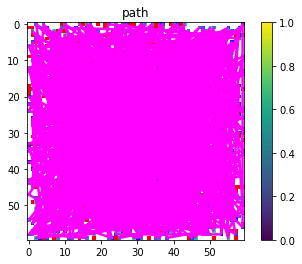

start -2.0 Goal -3.0
start 4 38 Goal 49 10


0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

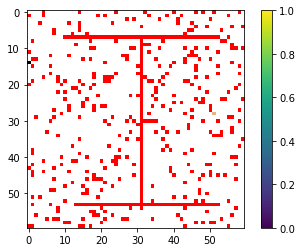

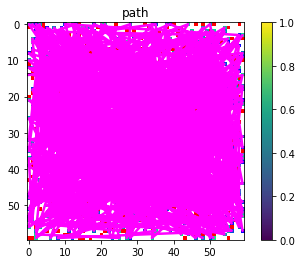

start -2.0 Goal -3.0
start 37 54 Goal 58 50


0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0

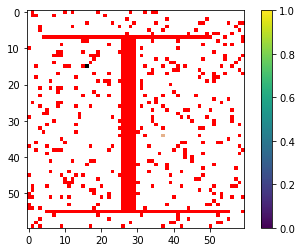

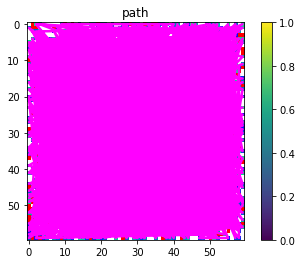

start -2.0 Goal -3.0
start 54 13 Goal 48 13


-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0

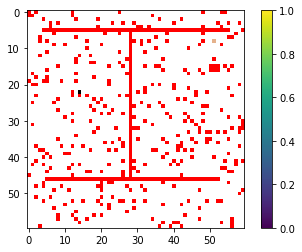

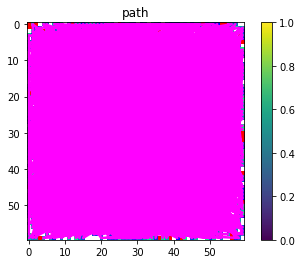

start -2.0 Goal -3.0
start 11 7 Goal 47 8


0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

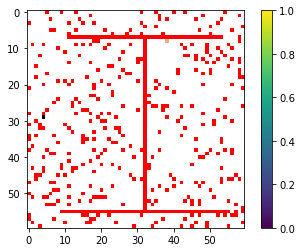

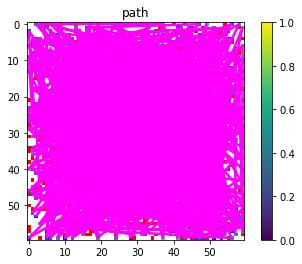

start -2.0 Goal -3.0
start 9 4 Goal 17 31


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0

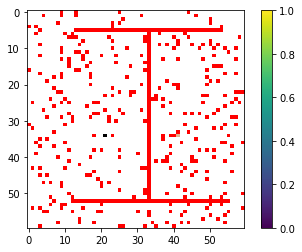

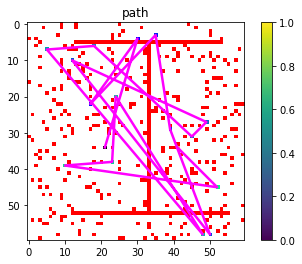

start -2.0 Goal -3.0
start 39 33 Goal 12 8


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

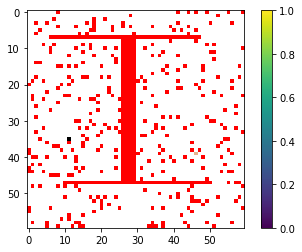

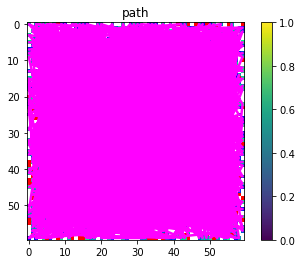

start -2.0 Goal -3.0
start 18 17 Goal 29 17


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	

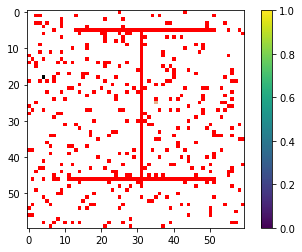

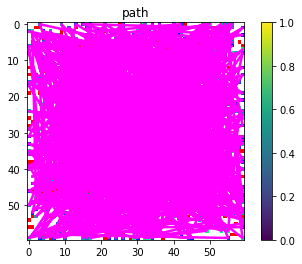

start -2.0 Goal -3.0
start 58 52 Goal 28 16


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0

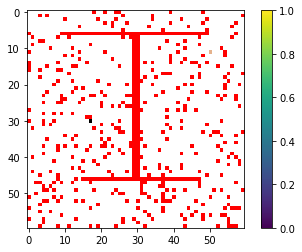

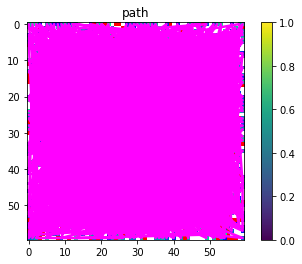

start -2.0 Goal -3.0
start 35 7 Goal 36 6


0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0

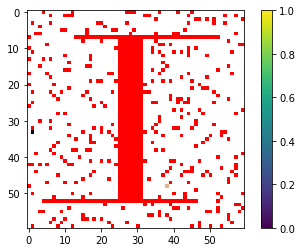

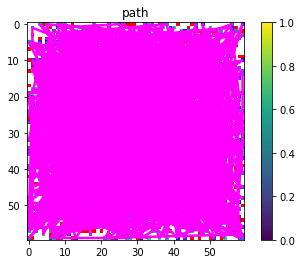

start -2.0 Goal -3.0
start 57 48 Goal 32 53


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

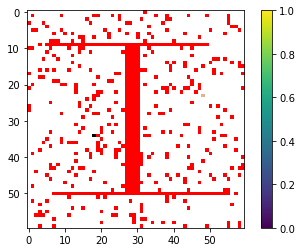

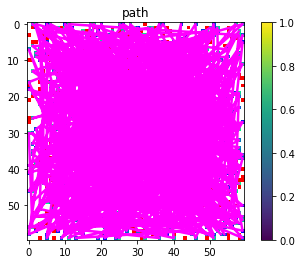

start -2.0 Goal -3.0
start 2 29 Goal 27 2


0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.

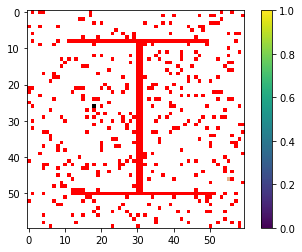

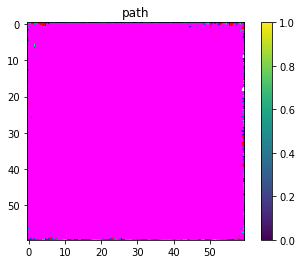

start -2.0 Goal -3.0
start 41 50 Goal 46 35


0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

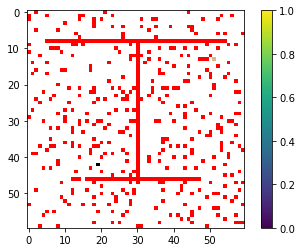

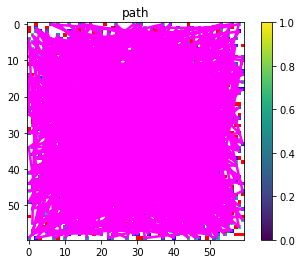

start -2.0 Goal -3.0
start 24 17 Goal 54 55


0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	

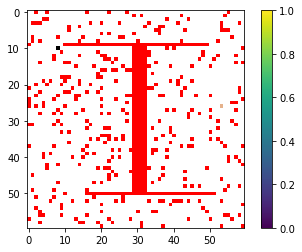

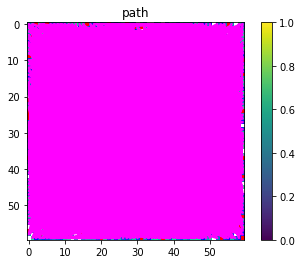

Total Nodes Expandes Per Iteration: [407, 1945, 206, 231, 1470, 1793, 951, 927, 1879, 2387, 937, 15, 1799, 872, 1885, 1084, 729, 3033, 952, 2749]
Total Path Taken Per Iteration: [816, 3892, 414, 464, 2942, 3588, 1904, 1856, 3760, 4776, 1876, 32, 3600, 1746, 3772, 2170, 1460, 6068, 1906, 5500]
Time Taken Per Iteration: [1.2079646587371826, 1.7256247997283936, 1.1620299816131592, 1.1634447574615479, 1.549591302871704, 1.6753547191619873, 1.4284629821777344, 1.3239185810089111, 1.7253422737121582, 2.116795301437378, 1.3256711959838867, 1.2440650463104248, 1.6024329662322998, 1.3071138858795166, 1.7133748531341553, 1.3342139720916748, 1.3023293018341064, 3.670560359954834, 1.3500375747680664, 2.6002681255340576]
Mean of Nodes: 1312.55
Mean of Path: 2627.1
Mean of Time Taken: 1.626429831981659
Standard Deviation of Nodes: 829.2678985104874
Standard Deviation of Nodes: 1658.5357970209748
Standard Deviation of Nodes: 0.5807163665844697


In [9]:
import time
import numpy

expandedObstacles = []
pathObstacles = []
timeObstacles=[]

for i in range(20):
    mapToSearch3, info=generateMap2d_obstacle([60, 60])
    start=time.time()
    expandedObstaclesNodes, randomPath=randomSearch(mapToSearch3)
    stop=time.time()
    expandedObstacles.append(expandedObstaclesNodes)
    pathObstacles.append(randomPath)
    timed=stop-start
    timeObstacles.append(timed) 

    
print(f"Total Nodes Expandes Per Iteration: {expandedObstacles}") 
print(f"Total Path Taken Per Iteration: {pathObstacles}")
print(f"Time Taken Per Iteration: {timeObstacles}")

print(f"Mean of Nodes: {numpy.mean(expandedObstacles)}")
print(f"Mean of Path: {numpy.mean(pathObstacles)}")
print(f"Mean of Time Taken: {numpy.mean(timeObstacles)}")


print(f"Standard Deviation of Nodes: {numpy.std(expandedObstacles)}")
print(f"Standard Deviation of Path: {numpy.std(pathObstacles)}")
print(f"Standard Deviation of Time Taken: {numpy.std(timeObstacles)}")
